# Atividade 01

## Regressão 02 - exercício 01

In [45]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prettytable as pt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from prettytable import PrettyTable

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [46]:
# Carregando o conjunto de dados
tips = sns.load_dataset("tips")

# Calculando a porcentagem da gorjeta em relação à conta total
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Calculando o valor líquido da conta (total_bill - tip)
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Exibindo as primeiras linhas do DataFrame
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [47]:
# Criando e ajustando um modelo de regressão linear simples
reg_tip = smf.ols('tip ~ net_bill', data=tips).fit()

# Exibindo um resumo estatístico do modelo de regressão
print(reg_tip.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           5.02e-23
Time:                        19:28:50   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

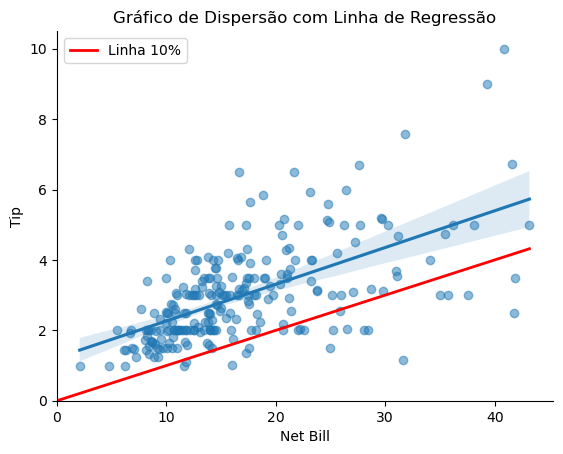

In [48]:
# Criando um conjunto de valores para a variável x
x = np.linspace(0, tips['net_bill'].max(), 100)

# Calculando os valores correspondentes para a variável y
y = 0.1 * x

# Criando um gráfico de dispersão com linha de regressão
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct'] < 0.5], scatter_kws={'alpha':0.5})

# Adicionando uma linha vermelha representando 10%
plt.plot(x, y, '-r', label='Linha 10%', linewidth=2)

# Definindo limites para os eixos x e y
plt.xlim(left=0)
plt.ylim(bottom=0)

# Adicionando uma legenda ao gráfico
plt.legend()

# Adicionando rótulos aos eixos
plt.xlabel('Net Bill')
plt.ylabel('Tip')

# Adicionando título ao gráfico
plt.title('Gráfico de Dispersão com Linha de Regressão')

# Removendo a moldura do gráfico
sns.despine()

# Exibindo o gráfico
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

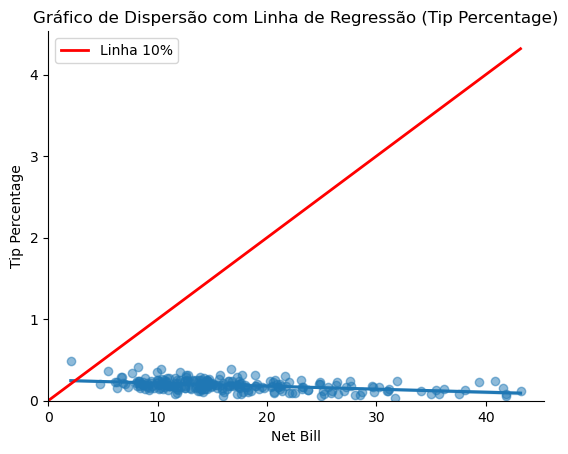

In [49]:
# Criando um conjunto de valores para a variável x
x = np.linspace(0, tips['net_bill'].max(), 100)

# Calculando os valores correspondentes para a variável y
y = 0.1 * x

# Gráfico de dispersão com linha de regressão para a porcentagem da gorjeta em relação à conta líquida
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct'] < 0.5], scatter_kws={'alpha':0.5})

# Adicionando uma linha vermelha representando 10%
plt.plot(x, y, '-r', label='Linha 10%', linewidth=2)

# Definindo limites para os eixos x e y
plt.xlim(left=0)
plt.ylim(bottom=0)

# Adicionando uma legenda ao gráfico
plt.legend()

# Adicionando rótulos aos eixos
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')

# Adicionando título ao gráfico
plt.title('Gráfico de Dispersão com Linha de Regressão (Tip Percentage)')

# Removendo a moldura do gráfico
sns.despine()

# Exibindo o gráfico
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

- O primeiro gráfico mostra que, à medida que a conta aumenta, a gorjeta também aumenta.

- O segundo gráfico mostra que a porcentagem da gorjeta é geralmente baixa; abaixo de 2%.

- A dispersão das gorjetas se torna maior com o aumento do valor da conta.

- Penso que não, sem os valores reais de R² não podemos compará-los diretamente.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [50]:
# Criando e ajustando um modelo de regressão linear para tip_pct
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Criando uma tabela para armazenar as estatísticas
table = pt.PrettyTable()
table.field_names = ["Statistic", "Value"]

# Adicionando R^2 para tip_pct
table.add_row(["R^2 tip_pct", f"{reg_tip_pct.rsquared:.4f}"])

# Prevendo valores para tip_pct com base no modelo ajustado
pred_tip_pct = reg_tip_pct.fittedvalues

# Calculando as previsões para tip usando tip_pct e net_bill
pred_tip = pred_tip_pct * tips['net_bill']

# Calculando R^2 para tip
ss_res = sum((tips['tip'] - pred_tip) ** 2)
ss_tot = sum((tips['tip'] - tips['tip'].mean()) ** 2)
r_squared_tip = 1 - (ss_res / ss_tot)

# Adicionando R^2 para tip
table.add_row(["R^2 tip", f"{r_squared_tip:.4f}"])

# Exibindo a tabela
print(table)

+-------------+--------+
|  Statistic  | Value  |
+-------------+--------+
| R^2 tip_pct | 0.0913 |
|   R^2 tip   | 0.1089 |
+-------------+--------+


# Atividade 02

## Regressão 02 - exercício 02

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [51]:
# Exibindo as primeiras linhas do DataFrame
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


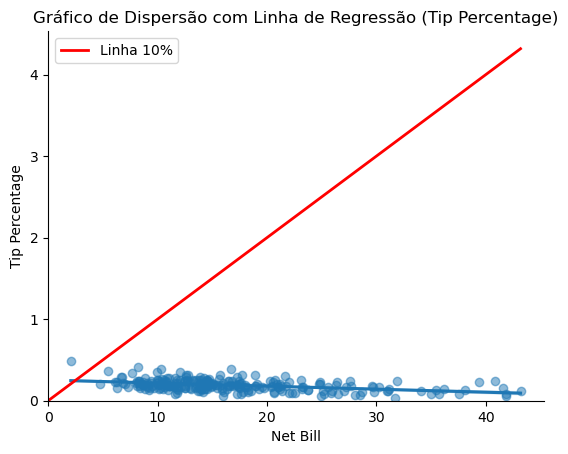

In [52]:
# Criando um conjunto de valores para a variável x
x = np.linspace(0, tips['net_bill'].max(), 100)

# Calculando os valores correspondentes para a variável y
y = 0.1 * x

# Criando um gráfico de dispersão com linha de regressão para a porcentagem da gorjeta
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct'] < 0.5], scatter_kws={'alpha': 0.5})

# Adicionando uma linha vermelha representando 10%
plt.plot(x, y, '-r', label='Linha 10%', linewidth=2)

# Definindo limites para os eixos x e y
plt.xlim(left=0)
plt.ylim(bottom=0)

# Adicionando uma legenda ao gráfico
plt.legend()

# Adicionando rótulos aos eixos
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')

# Adicionando título ao gráfico
plt.title('Gráfico de Dispersão com Linha de Regressão (Tip Percentage)')

# Removendo a moldura do gráfico
sns.despine()

# Exibindo o gráfico
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [53]:
# Criando e ajustando um modelo de regressão linear com logaritmo para tip_pct
model_log = smf.ols(formula='tip_pct ~ np.log(net_bill)', data=tips).fit()

# Exibindo um resumo estatístico do modelo
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           1.62e-13
Time:                        19:28:51   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

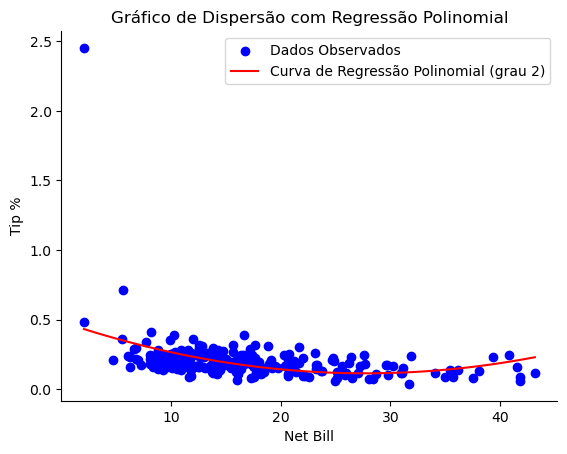

In [54]:
# Preparando os dados para um modelo de regressão polinomial
X = tips['net_bill'].to_numpy().reshape(-1, 1)
y = tips['tip_pct'].to_numpy().reshape(-1, 1)

# Convertendo para numpy arrays antes de aplicar a regressão polinomial
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# Criando características polinomiais de grau 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Criando e ajustando um modelo de regressão linear polinomial
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Criando um conjunto de valores para a variável X (net_bill)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Calculando os valores correspondentes para a variável Y (tip_pct)
y_pred = poly_model.predict(poly_features.transform(X_range))

# Plotando o gráfico de dispersão e a curva de regressão polinomial
plt.scatter(X, y, color='blue', label='Dados Observados')
plt.plot(X_range, y_pred, color='red', label='Curva de Regressão Polinomial (grau 2)')
plt.xlabel('Net Bill')
plt.ylabel('Tip %')
plt.title('Gráfico de Dispersão com Regressão Polinomial')
plt.legend()
sns.despine()

# Exibindo o gráfico
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

R2 modelo log(tip_pct): 0.23534487140864324


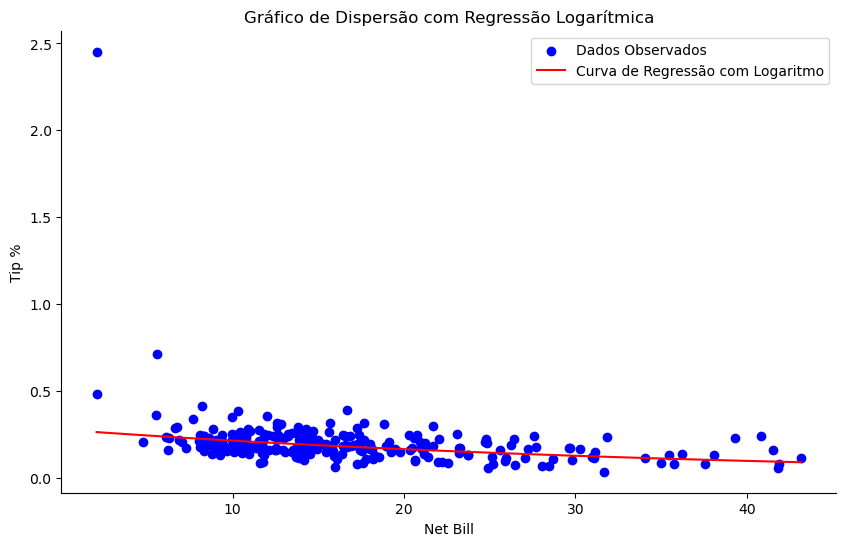

In [55]:
# Transformando a variável dependente 'tip_pct' usando o logaritmo natural
y_log = np.log(tips['tip_pct'].replace(0, np.nan).dropna())

# Preparando os dados para o modelo linear com logaritmo
X = tips['net_bill'].loc[y_log.index].values.reshape(-1, 1)

# Criando e ajustando um modelo de regressão linear com logaritmo
log_model = LinearRegression()
log_model.fit(X, y_log)

# Calculando o coeficiente de determinação (R^2) para o modelo
R2_log = log_model.score(X, y_log)

# Prevendo os valores transformados de 'tip_pct'
y_pred_log = np.exp(log_model.predict(X))

# Criando um conjunto de valores para a variável X (net_bill)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Calculando os valores correspondentes para a variável Y (tip_pct)
y_pred_range_log = np.exp(log_model.predict(X_range))

# Plotando o gráfico de dispersão e a curva de regressão com logaritmo
plt.figure(figsize=(10, 6))
plt.scatter(X.flatten(), np.exp(y_log), color='blue', label='Dados Observados')
plt.plot(X_range.flatten(), y_pred_range_log, color='red', label='Curva de Regressão com Logaritmo')
plt.xlabel('Net Bill')
plt.ylabel('Tip %')
plt.title('Gráfico de Dispersão com Regressão Logarítmica')
plt.legend()
sns.despine()

# Exibindo o coeficiente de determinação (R^2) para o modelo com logaritmo
print(f'R2 modelo log(tip_pct): {R2_log}')

# Exibindo o gráfico
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

R2 modelo log(tip_pct) ~ log(net_bill): 0.2934740215080778


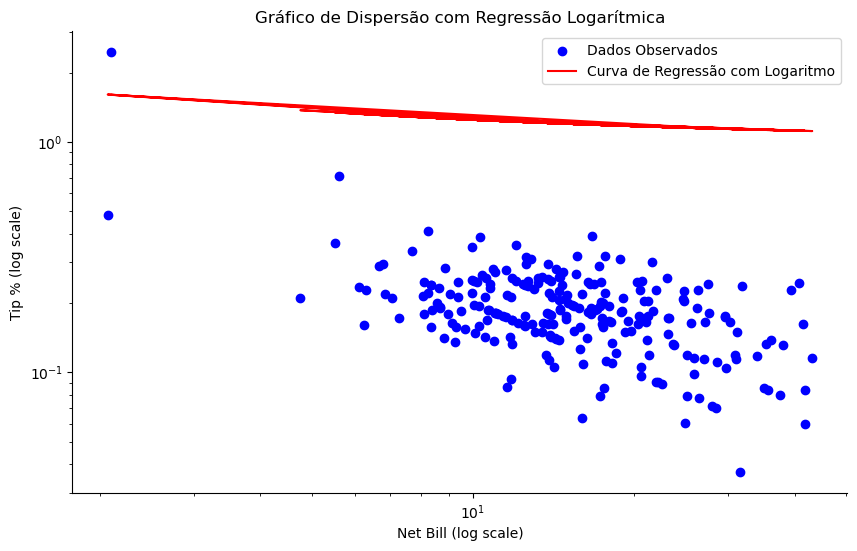

In [56]:
# Transformando as variáveis independentes e dependentes usando o logaritmo natural
X_log = np.log(tips['net_bill'].replace(0, np.nan).dropna().to_numpy().reshape(-1, 1))
y_log = np.log(tips['tip_pct'].replace(0, np.nan).dropna().to_numpy().reshape(-1, 1))

# Criando e ajustando um modelo de regressão linear com logaritmo para ambas as variáveis
log_log_model = LinearRegression()
log_log_model.fit(X_log, y_log)

# Calculando o coeficiente de determinação (R^2) para o modelo
R2_log_log = log_log_model.score(X_log, y_log)

# Prevendo os valores transformados de 'tip_pct'
y_pred_log_log = np.exp(log_log_model.predict(X_log))

# Plotando o gráfico de dispersão e a curva de regressão com logaritmo para ambas as variáveis
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(X_log), np.exp(y_log), color='blue', label='Dados Observados')
plt.plot(np.exp(X_log), np.exp(y_pred_log_log), color='red', label='Curva de Regressão com Logaritmo')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Net Bill (log scale)')
plt.ylabel('Tip % (log scale)')
plt.title('Gráfico de Dispersão com Regressão Logarítmica')
plt.legend()
sns.despine()

# Exibindo o coeficiente de determinação (R^2) para o modelo com logaritmo para ambas as variáveis
print(f'R2 modelo log(tip_pct) ~ log(net_bill): {R2_log_log}')

# Exibindo o gráfico
plt.show()

###  6. qual modelo resultou no melhor ajuste?

- O segundo modelo, que ajusta tip_pct em função do logaritmo de net_bill, parece ter o melhor ajuste.

# Atividade 03

## Regressão 02 - exercício 03

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [57]:
# Criando matrizes de design usando patsy para a regressão linear
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

In [58]:
def fit_ols_model(y, X):
    # Ajustando um modelo de regressão linear ordinária (OLS)
    model = sm.OLS(y, X).fit()
    
    # Identificando as variáveis significativas com p-value < 0.05
    significant_vars = model.pvalues[model.pvalues < 0.05].index
    significant_vars = significant_vars[significant_vars != 'Intercept']
    
    return model, significant_vars

# Ajustando o modelo OLS e obtendo as variáveis significativas
model_tip, significant_vars = fit_ols_model(y, X)

# Exibindo um resumo estatístico do modelo
print(model_tip.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.64e-20
Time:                        19:28:53   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

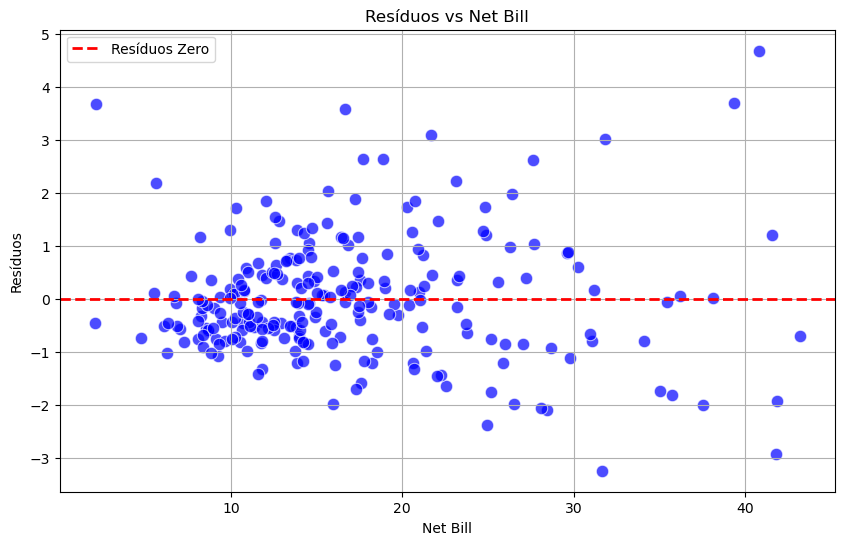

In [59]:
# Calculando os resíduos do modelo de regressão linear
residuals = model_tip.resid

# Criando um gráfico de dispersão dos resíduos em relação a net_bill
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['net_bill'], y=residuals, color='blue', alpha=0.7, s=80)

# Adicionando uma linha horizontal representando a linha de base zero
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Resíduos Zero')

# Definindo rótulos e título do gráfico
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Net Bill')

# Adicionando legenda e grade ao gráfico
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     25.06
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.41e-17
Time:                        19:28:53   Log-Likelihood:                -382.22
No. Observations:                 244   AIC:                             774.4
Df Residuals:                     239   BIC:                             791.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3107      0.469     -2.

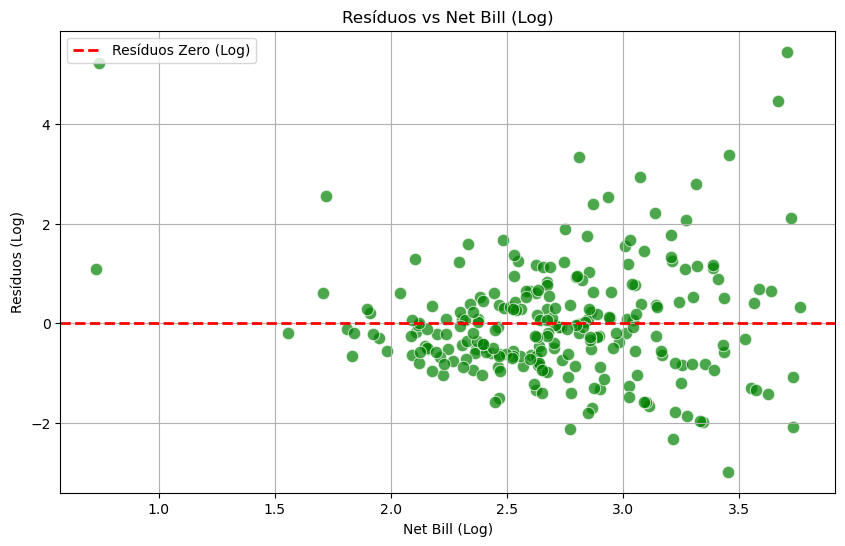

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           4.96e-22
Time:                        19:28:54   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0743      0.353      3.039      0.0

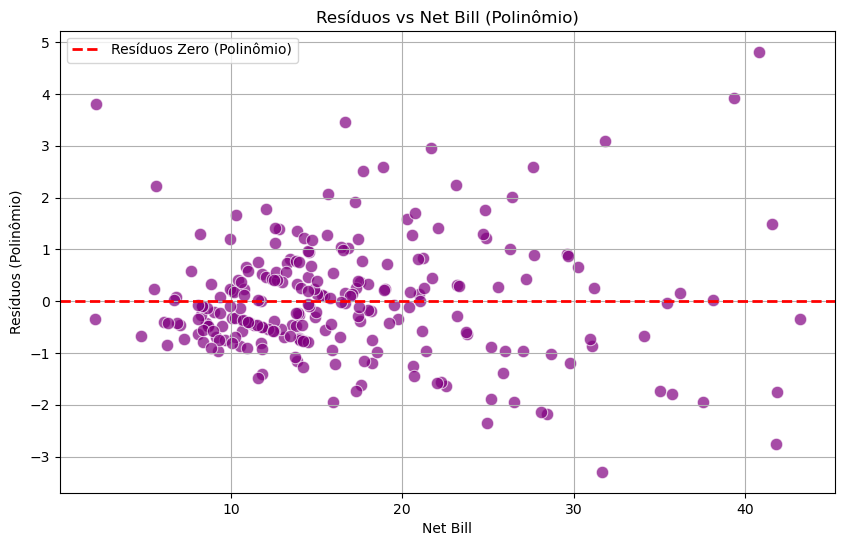

In [60]:
# Testando a transformação de net_bill no logaritmo
tips['net_bill_log'] = np.log(tips['net_bill'])

# Criando matrizes de design usando patsy para a regressão linear com logaritmo
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + net_bill_log', data=tips, return_type='dataframe')

# Ajustando o modelo OLS com logaritmo e obtendo um resumo estatístico
model_tip_log = sm.OLS(y_log, X_log).fit()
print(model_tip_log.summary())

# Calculando os resíduos do modelo de regressão linear com logaritmo
residuals_log = model_tip_log.resid

# Criando um gráfico de dispersão dos resíduos em relação ao net_bill_log
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['net_bill_log'], y=residuals_log, color='green', alpha=0.7, s=80)

# Adicionando uma linha horizontal representando a linha de base zero
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Resíduos Zero (Log)')

# Definindo rótulos e título do gráfico
plt.xlabel('Net Bill (Log)')
plt.ylabel('Resíduos (Log)')
plt.title('Resíduos vs Net Bill (Log)')

# Adicionando legenda e grade ao gráfico
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

# Testando a transformação de net_bill em um polinômio de grau 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(tips[['net_bill']])

# Ajustando o modelo OLS com polinômio e obtendo um resumo estatístico
model_tip_poly = sm.OLS(y, X_poly).fit()
print(model_tip_poly.summary())

# Calculando os resíduos do modelo de regressão polinomial
residuals_poly = model_tip_poly.resid

# Criando um gráfico de dispersão dos resíduos em relação a net_bill com polinômio
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['net_bill'], y=residuals_poly, color='purple', alpha=0.7, s=80)

# Adicionando uma linha horizontal representando a linha de base zero
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Resíduos Zero (Polinômio)')

# Definindo rótulos e título do gráfico
plt.xlabel('Net Bill')
plt.ylabel('Resíduos (Polinômio)')
plt.title('Resíduos vs Net Bill (Polinômio)')

# Adicionando legenda e grade ao gráfico
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

- o modelo com a transformação logarítmica de net_bill parece melhor, pois tem um diagnóstico de resíduos mais favorável, apesar de ter um R² menor.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [61]:
# Criando matrizes de design com logaritmo natural para a variável dependente
y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

In [62]:
# Ajustando um modelo de regressão linear ordinária (OLS) com logaritmo natural
model_tip_log = sm.OLS(y_log, X_log).fit()

# Identificando as variáveis significativas com p-value < 0.05
significant_vars_log = model_tip_log.pvalues[model_tip_log.pvalues < 0.05].index

# Selecionando as variáveis significativas do conjunto original
X_log_significant = X_log[significant_vars_log]

# Ajustando um novo modelo com as variáveis significativas
model_tip_significant_log = sm.OLS(y_log, X_log_significant).fit()

# Exibindo um resumo estatístico do novo modelo
print(model_tip_significant_log.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.60e-21
Time:                        19:28:55   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

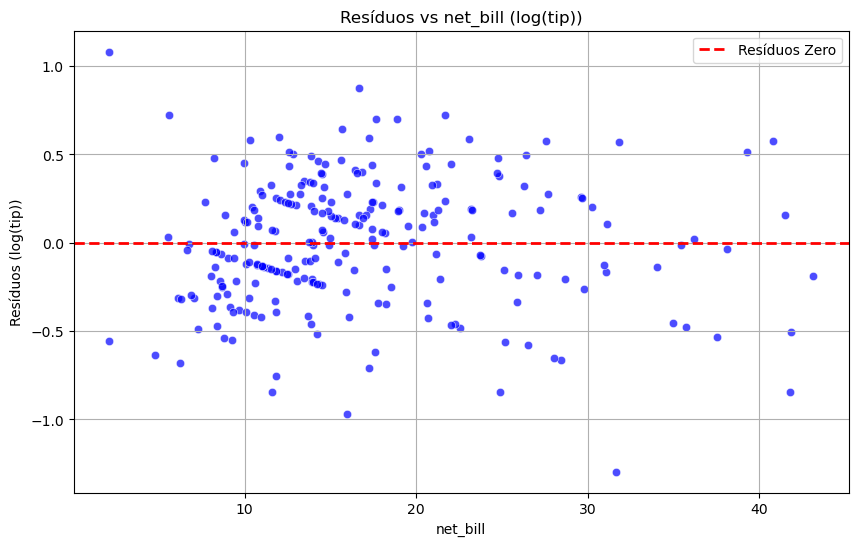

In [63]:
# Calculando os resíduos do modelo de regressão linear com logaritmo natural e variáveis significativas
residuals_log = model_tip_significant_log.resid

# Criando um gráfico de dispersão dos resíduos em relação a net_bill com logaritmo natural
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['net_bill'], y=residuals_log, color='blue', alpha=0.7)

# Adicionando uma linha horizontal representando a linha de base zero
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Resíduos Zero')

# Definindo rótulos e título do gráfico
plt.xlabel('net_bill')
plt.ylabel('Resíduos (log(tip))')
plt.title('Resíduos vs net_bill (log(tip))')

# Adicionando legenda e grade ao gráfico
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [64]:
# Criando matrizes de design com logaritmo natural para a variável dependente e independente
y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + np.log(net_bill)', data=tips, return_type='dataframe')

# Ajustando um modelo de regressão linear ordinária (OLS) com logaritmo natural
model_tip_log = sm.OLS(y_log, X_log).fit()

# Exibindo um resumo estatístico do modelo
print(model_tip_log.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     28.12
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           3.79e-19
Time:                        19:28:55   Log-Likelihood:                -96.213
No. Observations:                 244   AIC:                             202.4
Df Residuals:                     239   BIC:                             219.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4185      0.145  

In [65]:
# Criando matrizes de design com logaritmo natural e termo polinomial para a variável dependente e independente
y_poly, X_poly = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + I(net_bill**2)', data=tips, return_type='dataframe')

# Ajustando um modelo de regressão linear ordinária (OLS) com logaritmo natural e termo polinomial
model_tip_poly = sm.OLS(y_poly, X_poly).fit()

# Exibindo um resumo estatístico do modelo
print(model_tip_poly.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     20.40
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           1.78e-14
Time:                        19:28:55   Log-Likelihood:                -107.42
No. Observations:                 244   AIC:                             224.8
Df Residuals:                     239   BIC:                             242.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7338      0.067  

In [66]:
# Adicionando colunas de previsões e resíduos aos dados originais
tips['predicted_log'] = model_tip_log.predict(X_log)
tips['predicted_poly'] = model_tip_poly.predict(X_poly)

# Extraindo a série de valores reais da variável dependente
y_log_series = np.exp(y_log).iloc[:, 0]

# Calculando os resíduos para os modelos logarítmico e polinomial
tips['resid_log'] = np.exp(tips['predicted_log']) - y_log_series
tips['resid_poly'] = np.exp(tips['predicted_poly']) - y_log_series

# Calculando os termos para a análise de variância
sst = np.sum((y_log_series - np.mean(y_log_series))**2)
ssr_log = np.sum(tips['resid_log']**2)
ssr_poly = np.sum(tips['resid_poly']**2)

# Calculando os coeficientes de determinação (R^2) para os modelos logarítmico e polinomial
r_squared_tip_log = 1 - (ssr_log / sst)
r_squared_tip_poly = 1 - (ssr_poly / sst)

# Criando uma tabela para exibir os resultados
result_table = PrettyTable()
result_table.field_names = ["Modelo", "R²"]

# Adicionando os resultados à tabela
result_table.add_row(["Logarítmico de net_bill", f"{r_squared_tip_log:.4f}"])
result_table.add_row(["Polinômio de net_bill", f"{r_squared_tip_poly:.4f}"])

# Exibindo a tabela
print(result_table)

+-------------------------+--------+
|          Modelo         |   R²   |
+-------------------------+--------+
| Logarítmico de net_bill | 0.3046 |
|  Polinômio de net_bill  | 0.2553 |
+-------------------------+--------+


- o modelo com log de net_bill tem um coeficiente de determinação melhor.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [67]:
# Carregando o conjunto de dados de previsão de renda
previsao_renda = pd.read_csv('previsao_de_renda.csv')

# Removendo linhas com valores ausentes na coluna 'tempo_emprego'
previsao_renda = previsao_renda.dropna(subset=['tempo_emprego'])

# Removendo valores infinitos na coluna 'tempo_emprego'
previsao_renda = previsao_renda.replace([np.inf, -np.inf], np.nan).dropna(subset=['tempo_emprego'])

# Adicionando uma coluna constante para a variável independente
X_renda = sm.add_constant(previsao_renda['tempo_emprego'])

# Definindo a variável dependente
y_renda = previsao_renda['renda']

# Ajustando um modelo de regressão linear simples
model_renda_simple = sm.OLS(y_renda, X_renda).fit()

# Exibindo um resumo estatístico do modelo
print(model_renda_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:28:55   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

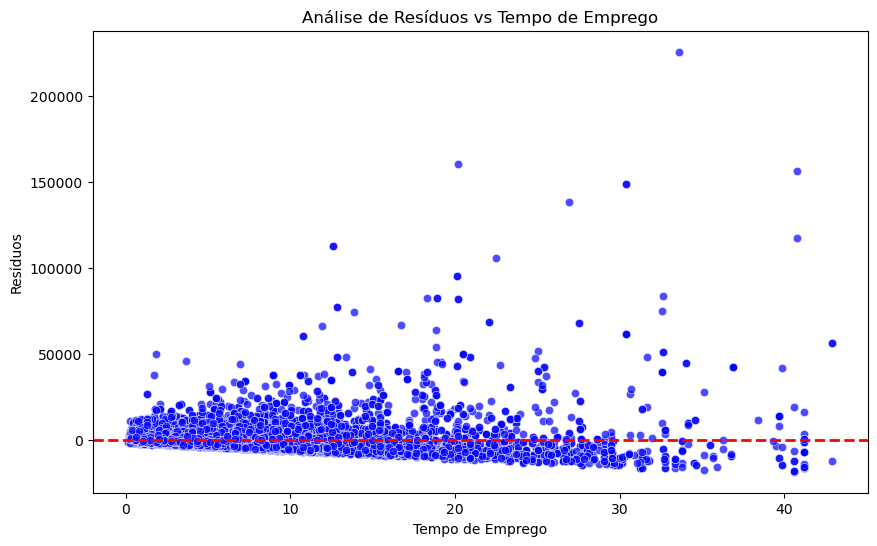

In [68]:
# Calculando os resíduos do modelo de regressão linear simples
residuals_renda_simple = model_renda_simple.resid

# Criando um gráfico de dispersão dos resíduos em relação ao tempo de emprego
plt.figure(figsize=(10, 6))
sns.scatterplot(x=previsao_renda['tempo_emprego'], y=residuals_renda_simple, color='blue', alpha=0.7)

# Adicionando uma linha horizontal representando a linha de base zero
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Definindo rótulo dos eixos e título do gráfico
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos vs Tempo de Emprego')

# Exibindo o gráfico
plt.show()

In [69]:
# Definindo a fórmula para o modelo de regressão linear múltipla
formula = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + tempo_emprego'

# Criando matrizes de design para a variável dependente e variáveis independentes
y_renda_multi, X_renda_multi = patsy.dmatrices(formula, data=previsao_renda, return_type='dataframe')

# Ajustando um modelo de regressão linear múltipla
model_renda_multi = sm.OLS(y_renda_multi, X_renda_multi).fit()

# Exibindo um resumo estatístico do modelo
print(model_renda_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:28:56   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [70]:
# Identificando as variáveis significativas com p-value < 0.05 no modelo de regressão linear múltipla
significant_vars_renda_multi = [var for var in model_renda_multi.pvalues.index if model_renda_multi.pvalues[var] < 0.05]

# Selecionando as variáveis significativas do conjunto original
X_renda_multi_significant = X_renda_multi[significant_vars_renda_multi]

# Ajustando um novo modelo com as variáveis significativas
model_renda_multi_significant = sm.OLS(y_renda_multi, X_renda_multi_significant).fit()

# Exibindo um resumo estatístico do novo modelo
print(model_renda_multi_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     845.4
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:28:56   Log-Likelihood:            -1.2881e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12421   BIC:                         2.577e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

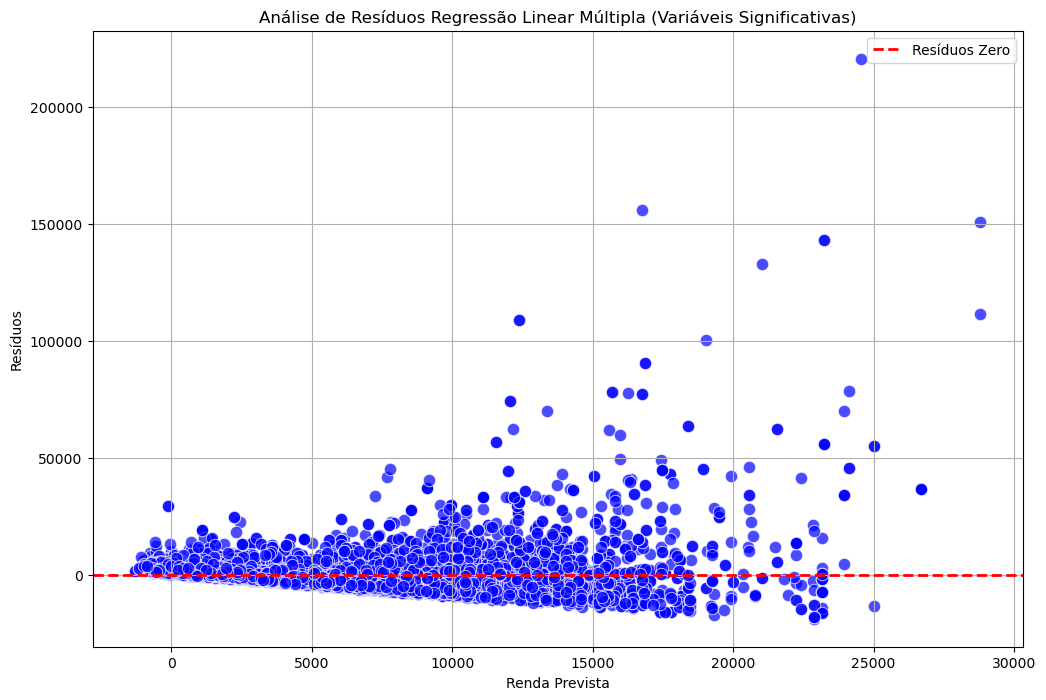

In [71]:
# Calculando os resíduos do modelo de regressão linear múltipla com variáveis significativas
residuals_renda_multi_significant = model_renda_multi_significant.resid

# Criando um gráfico de dispersão dos resíduos em relação à renda prevista
plt.figure(figsize=(12, 8))
sns.scatterplot(x=model_renda_multi_significant.fittedvalues, y=residuals_renda_multi_significant, color='blue', alpha=0.7, s=80)

# Adicionando uma linha horizontal representando a linha de base zero
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Resíduos Zero')

# Definindo rótulo dos eixos e título do gráfico
plt.xlabel('Renda Prevista')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos Regressão Linear Múltipla (Variáveis Significativas)')

# Adicionando legenda e grade ao gráfico
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

- A grande concentração pode indicar que a variabilidade dos resíduos é menor para valores menores.

- Os pontos mais centralizados na linha base sugerem que o modelo está fazendo boas previsões.